<a href="https://colab.research.google.com/github/shivani-202/Biomedical-Document-Classification/blob/main/dataset03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/datasettext.csv')
df.head()

,abstract_text,line_number,total_lines,current_line,target,word_count
0,This pilot study was registered at Controlled ...,12,13,12_13,BACKGROUND,18
1,"Cumulative evidence from epidemiological , pre...",0,16,0_16,BACKGROUND,19
2,Chlorhexidine ( CHX ) mouth rinse/spray can st...,0,10,0_10,BACKGROUND,25
3,Ovarian failure necessitates substitution with...,2,16,2_16,BACKGROUND,22
4,Animal studies indicate that nicotinamide phos...,0,12,0_12,BACKGROUND,23


In [2]:
df.info(), df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21459 entries, 0 to 21458
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   abstract_text  21459 non-null  object
 1   line_number    21459 non-null  int64 
 2   total_lines    21459 non-null  int64 
 3   current_line   21459 non-null  object
 4   target         21459 non-null  object
 5   word_count     21459 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 1006.0+ KB


(None,
         line_number   total_lines    word_count
 count  21459.000000  21459.000000  21459.000000
 mean       6.349224     12.447318     25.633580
 std        4.425220      3.355649     14.622477
 min        0.000000      4.000000      1.000000
 25%        3.000000     10.000000     16.000000
 50%        6.000000     12.000000     23.000000
 75%        9.000000     14.000000     32.000000
 max       36.000000     37.000000    209.000000)



*   There are no missing values in the dataset.
*   Column Types:
1. abstract_text: Contains the actual text (non-numeric, categorical).
2. line_number: Numerical, represents the position of the line within an abstract.
3. total_lines: Numerical, indicates the total number of lines in each abstract.
4. current_line: Categorical, likely represents a combination of the current and total line number.
5. target: Categorical, which could represent different sections of a paper (e.g., Background, Methods, etc.).



* Both the line_number and total_lines columns seem to have a fairly symmetric distribution around their mean values, with a median close to the mean, suggesting no extreme skewness.


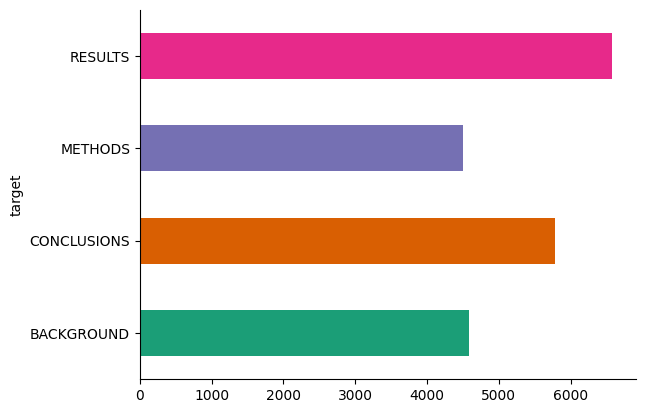

In [3]:
#target
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('target').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
#check for data adequacy
df.isnull().sum()

,0
abstract_text,0
line_number,0
total_lines,0
current_line,0
target,0
word_count,0


In [5]:
# Descriptive statistics for numeric columns
numeric_stats = df.describe()

# Descriptive statistics for categorical columns
categorical_stats = df.describe(include=['object'])

print(numeric_stats)
print(categorical_stats)

        line_number   total_lines    word_count
count  21459.000000  21459.000000  21459.000000
mean       6.349224     12.447318     25.633580
std        4.425220      3.355649     14.622477
min        0.000000      4.000000      1.000000
25%        3.000000     10.000000     16.000000
50%        6.000000     12.000000     23.000000
75%        9.000000     14.000000     32.000000
max       36.000000     37.000000    209.000000
                          abstract_text current_line   target
count                             21459        21459    21459
unique                            21421          378        4
top     http://www.clinicaltrials.gov .        10_11  RESULTS
freq                                  8          513     6580


In [6]:
# Count the number of occurrences of each class in the 'target' column
target_counts = df['target'].value_counts()
print(target_counts)

target
RESULTS        6580
CONCLUSIONS    5789
BACKGROUND     4590
METHODS        4500
Name: count, dtype: int64


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


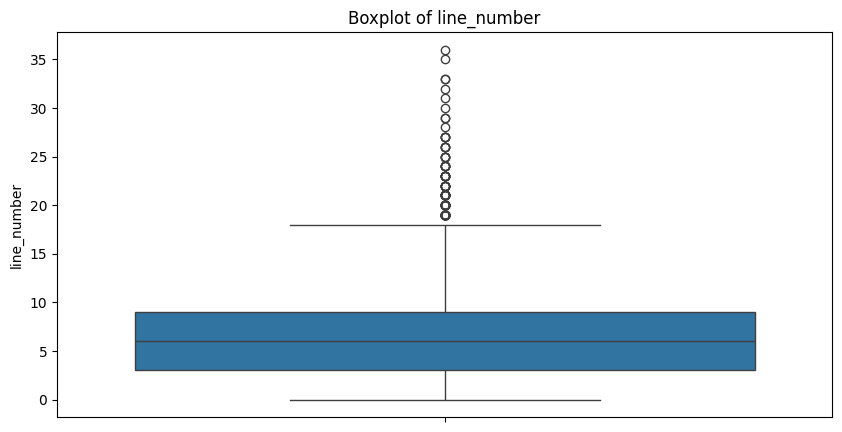

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


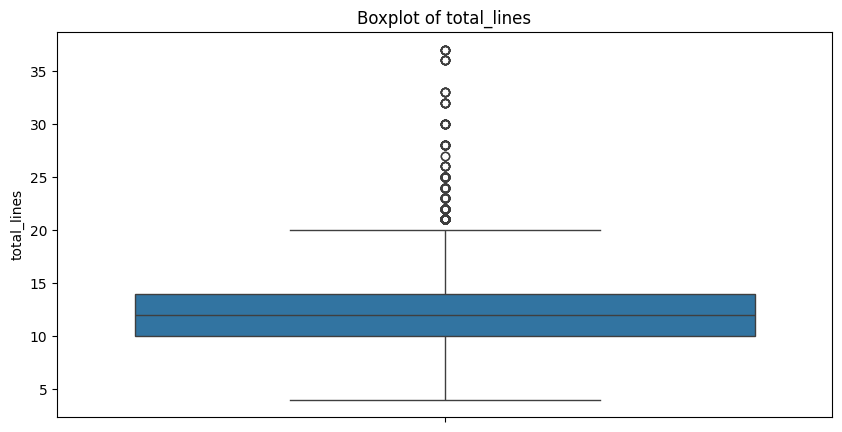

In [7]:
#check for outliers using boxplot
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for numerical columns
for col in ['line_number', 'total_lines']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

1. Majority of the Data: Most abstracts
have between 10 to 15 lines, with a median of 12 lines.
2. Outliers: A small number of abstracts (those with more than 20 lines) are outliers, with the maximum number of lines being around 36.

In [8]:
#removing outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Apply outlier removal on numerical columns
df_cleaned = remove_outliers(df, 'line_number')
df_cleaned = remove_outliers(df_cleaned, 'total_lines')


In [9]:
# Fill missing values with the mean for numeric columns only
df_numeric = df.select_dtypes(include=['number'])
df_filled = df.copy()

# Fill missing values in numeric columns with the mean of the respective column
df_filled[df_numeric.columns] = df_numeric.fillna(df_numeric.mean())

# If you want to fill missing values in non-numeric columns with a placeholder or some other value
df_filled['abstract_text'] = df_filled['abstract_text'].fillna('Unknown')

# Now df_filled has missing values replaced appropriately


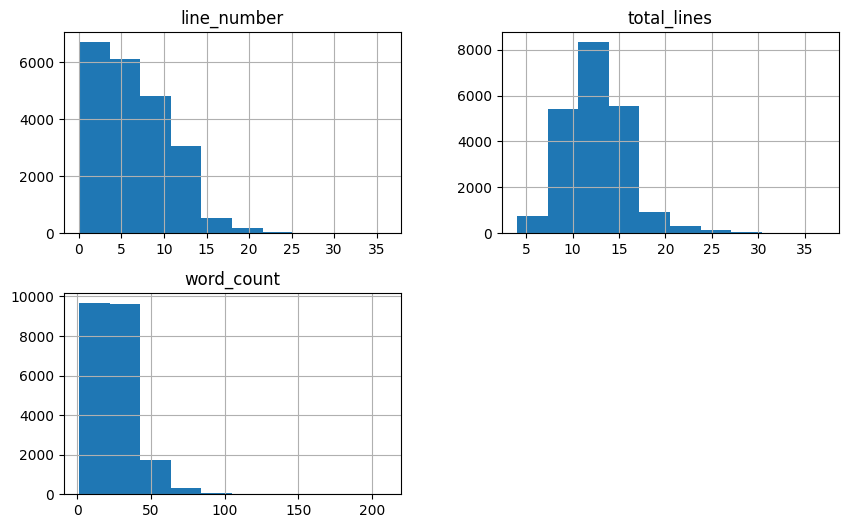

In [10]:
# Histogram to see distribution
df_filled.hist(figsize=(10, 6))
plt.show()

In [ ]:
# Calculate word count for each abstract
df_filled['word_count'] = df_filled['abstract_text'].apply(lambda x: len(str(x).split()))

# Descriptive statistics for word count
mean_word_count = df_filled['word_count'].mean()
percentile_75_word_count = np.percentile(df_filled['word_count'], 75)
percentile_25_word_count = np.percentile(df_filled['word_count'], 25)
median_word_count = df_filled['word_count'].median()
Q3_word_count = df_filled['word_count'].quantile(0.75)

# Output results
print(f'Mean Word Count: {mean_word_count}')
print(f'75th Percentile Word Count: {percentile_75_word_count}')
print(f'25th Percentile Word Count: {percentile_25_word_count}')
print(f'Median Word Count: {median_word_count}')
print(f'Q3 Word Count: {Q3_word_count}')


Mean Word Count: 26.384875
75th Percentile Word Count: 33.0
25th Percentile Word Count: 16.0
Median Word Count: 23.0
Q3 Word Count: 33.0


1. The abstracts tend to be fairly short, with most abstracts ranging from 16 to 33 words.
2. The median (23 words) is close to the mean (26.38 words). It suggests that the distribution is not heavily skewed, though there may be a few longer abstracts pulling the average slightly upward.

In [11]:
from scipy import stats
import numpy as np

# Calculate Q1 (25th percentile), Q3 (75th percentile), and IQR
Q1 = df_filled['word_count'].quantile(0.25)
Q3 = df_filled['word_count'].quantile(0.75)
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to exclude outliers (i.e., keep only the data points within the bounds)
trimmed_df = df_filled[(df_filled['word_count'] >= lower_bound) & (df_filled['word_count'] <= upper_bound)]

# Calculate the trimmed mean, median, and standard deviation
trimmed_mean = trimmed_df['word_count'].mean()
trimmed_median = trimmed_df['word_count'].median()
trimmed_std = trimmed_df['word_count'].std()

# Calculate the trimming factor (percentage of data removed)
total_data_points = len(df_filled)
trimmed_data_points = len(trimmed_df)
trimming_factor = (total_data_points - trimmed_data_points) / total_data_points * 100

# Print the results
print(f"Trimmed Mean: {trimmed_mean}")
print(f"Trimmed Median: {trimmed_median}")
print(f"Trimmed Standard Deviation: {trimmed_std}")
print(f"Trimming Factor: {trimming_factor:.2f}% of data points removed as outliers")


Trimmed Mean: 23.88503693689344
Trimmed Median: 22.0
Trimmed Standard Deviation: 10.889864501577263
Trimming Factor: 3.49% of data points removed as outliers


In [12]:
# Computing the correlation between numerical columns
correlation_matrix = df_filled[['line_number', 'total_lines']].corr()

# Display the correlation matrix
print(correlation_matrix)

             line_number  total_lines
line_number     1.000000     0.396556
total_lines     0.396556     1.000000


[[ 1.          0.03579071  0.03878999 ...  0.01604015 -0.00521441
  -0.0131402 ]
 [ 0.03579071  1.          0.03124336 ...  0.01422108 -0.00150518
  -0.02152964]
 [ 0.03878999  0.03124336  1.         ... -0.01903871  0.00122302
  -0.00514274]
 ...
 [ 0.01604015  0.01422108 -0.01903871 ...  1.          0.02976361
  -0.041191  ]
 [-0.00521441 -0.00150518  0.00122302 ...  0.02976361  1.
   0.00465518]
 [-0.0131402  -0.02152964 -0.00514274 ... -0.041191    0.00465518
   1.        ]]


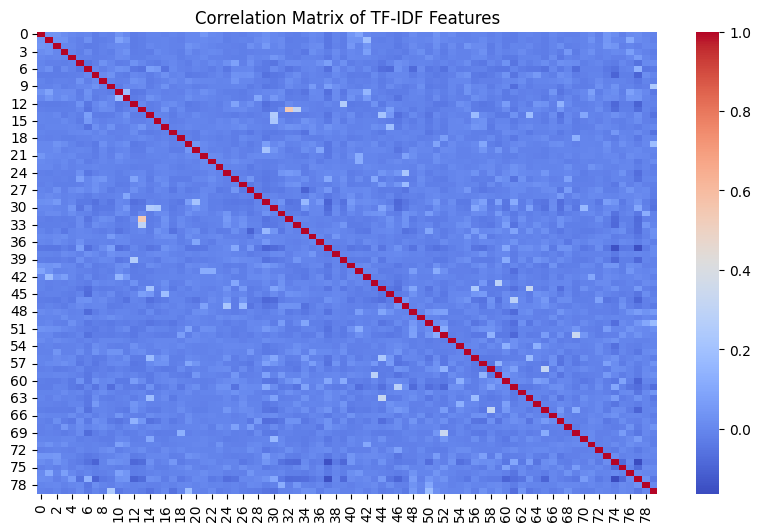

In [13]:
# Convert abstract texts to TF-IDF feature vectors
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

tfidf_vectorizer = TfidfVectorizer(max_features=80)
tfidf_matrix = tfidf_vectorizer.fit_transform(df_filled['abstract_text'])

# Convert the sparse matrix to a dense matrix
tfidf_dense = tfidf_matrix.toarray()

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(tfidf_dense, rowvar=False)

# Display the correlation matrix
print(correlation_matrix)

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of TF-IDF Features')
plt.show()

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, log_loss, matthews_corrcoef, cohen_kappa_score
)

X = df_filled['abstract_text']
y = df_filled['target']
# Vectorize the text data
tfidf = TfidfVectorizer(max_features=5000)  # Limit features to speed up computation
X_tfidf = tfidf.fit_transform(X)

# Function to run experiments with different algorithms and evaluation metrics
def run_experiment(model, model_name):
    results = {}

    for split in [(0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2)]:
        X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=split[1], random_state=42)

        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Check if model supports predict_proba
        if hasattr(model, "predict_proba"):
            y_prob = model.predict_proba(X_test)
        else:
            y_prob = None  # No probability predictions available

        # Collect all evaluation metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro')
        recall = recall_score(y_test, y_pred, average='macro')
        f1 = f1_score(y_test, y_pred, average='macro')

        # Use ROC-AUC and Log-Loss only if probability predictions are available
        auc = roc_auc_score(y_test, y_prob, multi_class='ovr') if y_prob is not None else 'N/A'
        loss = log_loss(y_test, y_prob) if y_prob is not None else 'N/A'

        cm = confusion_matrix(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        kappa = cohen_kappa_score(y_test, y_pred)

        results[split] = {
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUC-ROC': auc,
            'Confusion Matrix': cm,
            'Log-Loss': loss,
            'MCC': mcc,
            'Cohen\'s Kappa': kappa
        }

    return results

# Models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Multinomial NB': MultinomialNB(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='linear', probability=True)
}

# Running experiments for all models
for name, model in models.items():
    print(f"Running experiments for {name}...")
    results = run_experiment(model, name)

    # Display the results
    for split, metrics in results.items():
        print(f"\nTrain-Test Split: {split[0]*100}-{split[1]*100}")
        for metric, value in metrics.items():
            print(f"{metric}: {value}")


Running experiments for Logistic Regression...

Train-Test Split: 50.0-50.0
Accuracy: 0.7785647716682199
Precision: 0.7803877720563726
Recall: 0.7761447802104356
F1-Score: 0.7780181638285575
AUC-ROC: 0.9383812638431921
Confusion Matrix: [[1709  452   87   38]
 [ 344 2126   62  304]
 [  97   76 1821  306]
 [  54  316  240 2698]]
Log-Loss: 0.6301679927230324
MCC: 0.7020301809170791
Cohen's Kappa: 0.7018889180490362

Train-Test Split: 60.0-40.0
Accuracy: 0.7816868592730661
Precision: 0.7825197455882078
Recall: 0.779817748515651
F1-Score: 0.7810535811232707
AUC-ROC: 0.9394648736636056
Confusion Matrix: [[1376  342   74   32]
 [ 276 1682   49  251]
 [  81   62 1479  219]
 [  45  249  194 2173]]
Log-Loss: 0.6173165990246088
MCC: 0.7062235475143367
Cohen's Kappa: 0.7061570417563501

Train-Test Split: 70.0-30.0
Accuracy: 0.7837837837837838
Precision: 0.7846969579884271
Recall: 0.7826285314754495
F1-Score: 0.7835884495767305
AUC-ROC: 0.9386709474982053
Confusion Matrix: [[1058  238   52   21]
 